In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install -q numpy pandas matplotlib scikit-learn wordcloud
!pip install vaderSentiment


In [3]:
# Importing the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from textblob import TextBlob
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Loading the datasets
tweet1 = pd.read_csv('/content/drive/Shareddrives/Text mining Project/PROJECT/TWEET 1.csv')
tweet2 = pd.read_csv('/content/drive/Shareddrives/Text mining Project/PROJECT/TWEET 2.csv')

In [5]:
# Print the first 3 rows of tweet1 dataset
tweet1.head(3)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [6]:
# Print the first 3 rows of tweet2 dataset
tweet2.head(3)

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm


# EDA tweet1 Dataset

In [7]:
# Display information about tweet1 dataset
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
# Descriptive statistics for tweet1 dataset
tweet1.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
# Checking missing values
tweet1.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

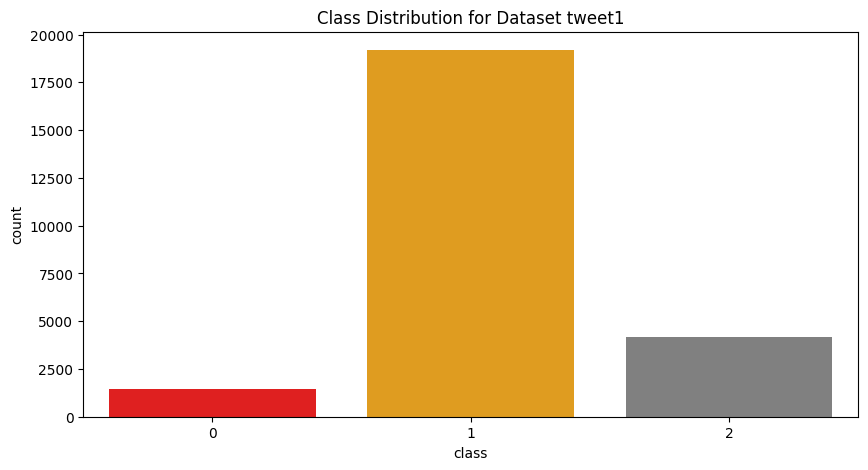

In [10]:
# Visualize Class Distriution
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=tweet1, palette=['red', 'orange', 'gray'])
plt.title('Class Distribution for Dataset tweet1')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments for Dataset tweet1')

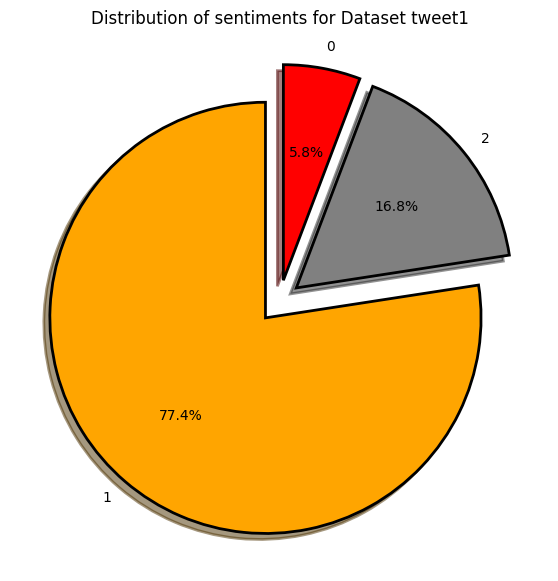

In [11]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('orange', 'gray', 'red')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweet1['class'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments for Dataset tweet1")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

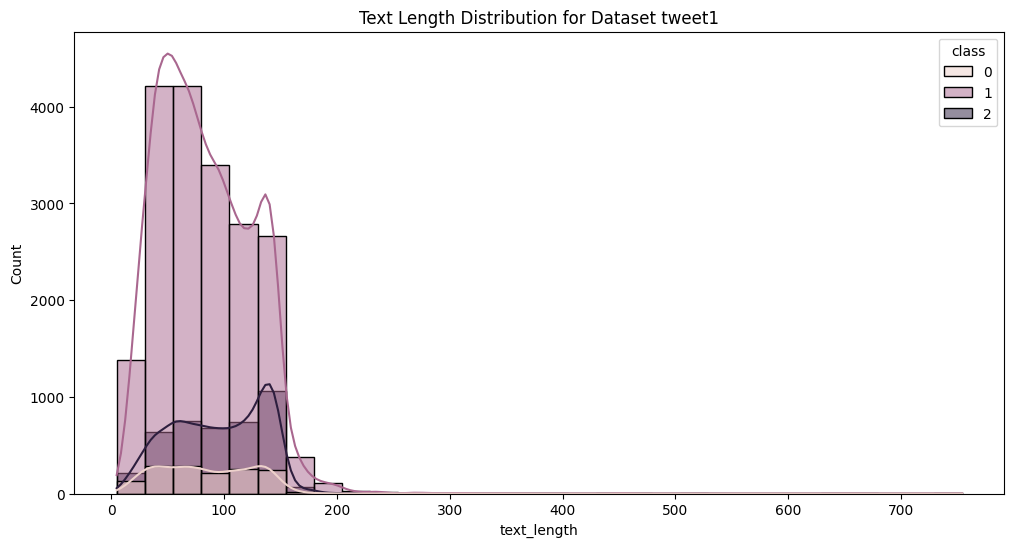

In [12]:
# Text length distribution
tweet1['text_length'] = tweet1['tweet'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(tweet1, x='text_length', hue='class', bins=30, kde=True)
plt.title('Text Length Distribution for Dataset tweet1')
plt.show()

# EDA tweet2 Dataset

In [13]:
# Display information about tweet2 dataset
tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40623 entries, 0 to 40622
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      40623 non-null  int64  
 1   id              40623 non-null  object 
 2   text            40623 non-null  object 
 3   label           40623 non-null  object 
 4   type            40623 non-null  object 
 5   model_wrong     26097 non-null  object 
 6   db.model_preds  26097 non-null  float64
 7   status          40623 non-null  object 
 8   round           40623 non-null  object 
 9   split           40623 non-null  object 
 10  annotator       40623 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.4+ MB


In [14]:
# Descriptive statistics for tweet2 dataset
tweet2.describe()

,Unnamed: 0,db.model_preds
count,40623.000000,26097.000000
mean,20371.983236,0.585455
std,11743.590183,0.448801
min,1.000000,0.000010
25%,10206.500000,0.036560
50%,20374.000000,0.910290
75%,30534.500000,0.995500
max,40740.000000,0.999920


In [15]:
# Checking missing values
tweet2.isnull().sum()

Unnamed: 0            0
id                    0
text                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64

In [16]:
# Distribution of dataset
tweet2.groupby('type').count()['id']

type
animosity          2377
dehumanization      840
derogation         9994
none              18499
notgiven           7645
support             144
threatening        1124
Name: id, dtype: int64

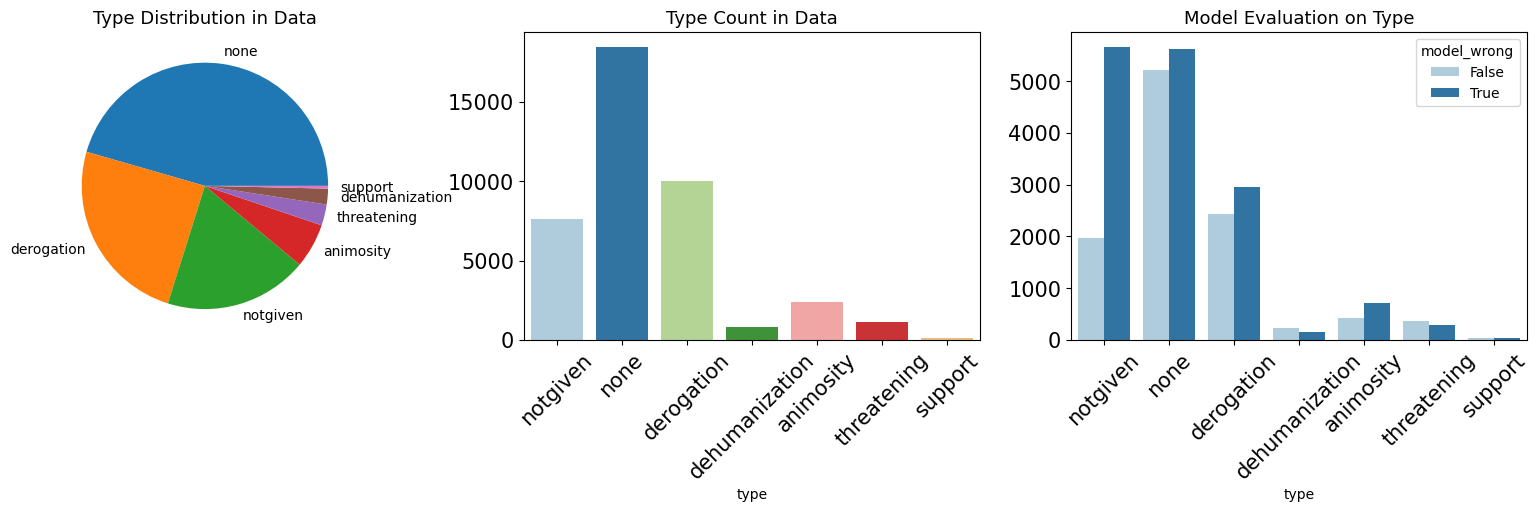

In [17]:
# Create subplots with 3 columns, set the figure size and DPI
fig, ax = plt.subplots(ncols=3, figsize=(20, 4), dpi=100)

# Plotting pie chart for 'type' distribution
tweet2['type'].value_counts().plot(kind='pie', ax=ax[0], labels=tweet2['type'].value_counts().index)
ax[0].set_title('Type Distribution in Data', fontsize=13)

# Plotting count plot for 'type'
sns.countplot(x='type', data=tweet2, ax=ax[1], palette='Paired')
ax[1].set_title('Type Count in Data', fontsize=13)

# Plotting count plot for 'type' with hue as 'model_wrong'
sns.countplot(x='type', data=tweet2, hue='model_wrong', ax=ax[2], palette='Paired')
ax[2].set_title('Model Evaluation on Type', fontsize=13)

# Customize plot appearance
for i in range(3):
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=15, rotation=45)
    ax[i].tick_params(axis='y', labelsize=15)

# Display the plots
plt.show()


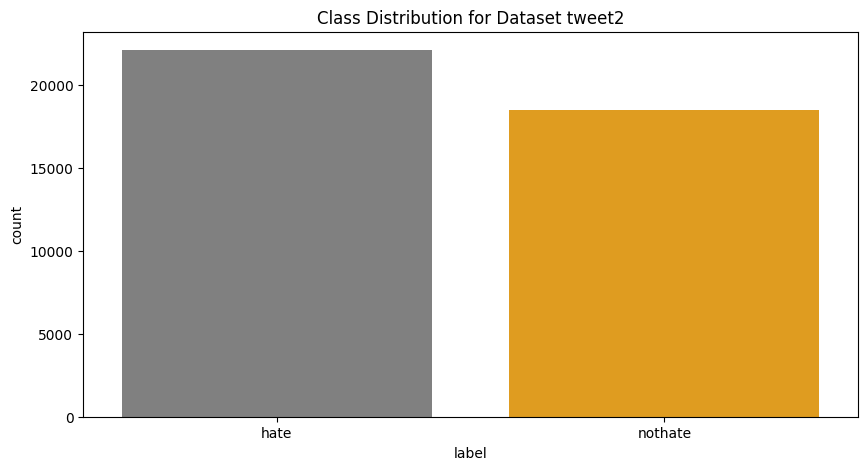

In [18]:
# Visualize Class Distriution
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=tweet2, palette=['gray', 'orange'])
plt.title('Class Distribution for Dataset tweet2')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments for Dataset tweet2')

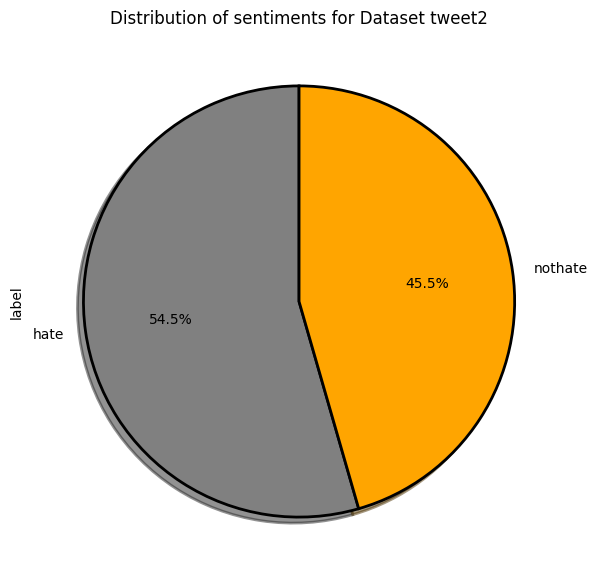

In [19]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('gray', 'orange')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweet2['label'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp)
plt.title("Distribution of sentiments for Dataset tweet2")


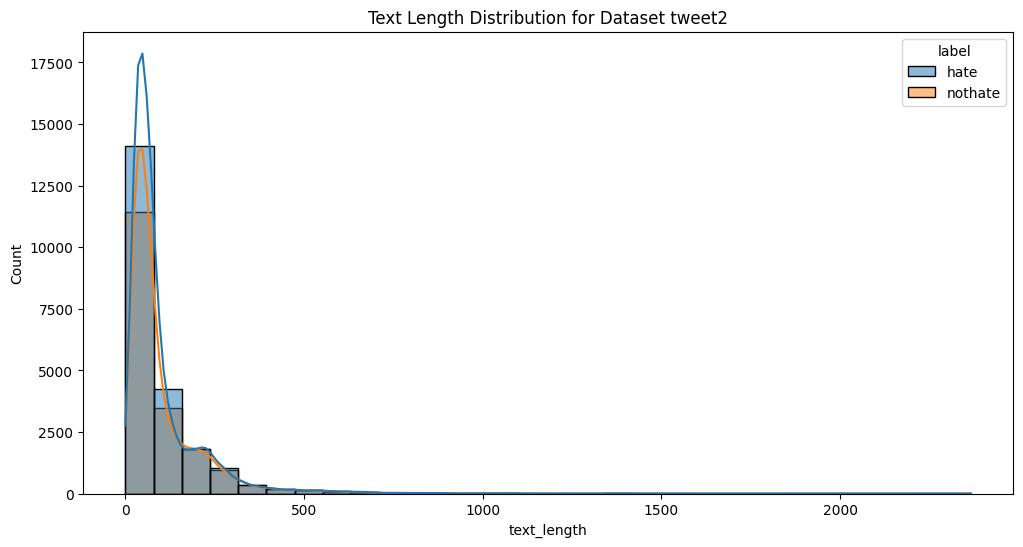

In [20]:
# Text length distribution
tweet2['text_length'] = tweet2['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(tweet2, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution for Dataset tweet2')
plt.show()


# Choosing important variables for further analysis

In [21]:
tweet1 = tweet1[['class', 'tweet']]
tweet2 = tweet2[['label', 'text']]

In [22]:
print("Tweet1 Dataset:")
print(tweet1.head(3))
print("\n Tweet2 Dataset:")
print(tweet2.head(3))

Tweet1 Dataset:
   class                                              tweet
0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...

 Tweet2 Dataset:
  label                                               text
0  hate  It should be legal for a husband to rape his wife
1  hate                            dalits are lowlife scum
2  hate                                dalits are lowlives


# Data Cleaning

In [23]:
def clean_and_preprocess(text):
  # Convert text to lowercase
  text = text.lower()
  # Remove URLS
  text = re.sub(r'http\S+', '', text)
  # Remove mentions
  text = re.sub(r'@\w+', '', text)
  # # Remove Hashtags
  text = re.sub(r'#\w+', '', text)
  # Remove non-alphabetic characters and punctuations
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Remove extra white spaces
  text = ' '.join(text.split())
  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  text = ' '.join([word for word in text.split() if word not in stop_words])
  # Stemming
  stemmer = PorterStemmer()
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text

# Wordclouds

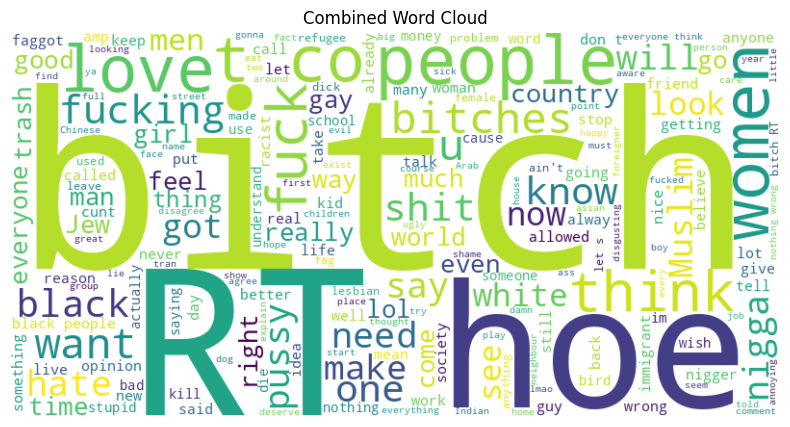

In [24]:
# Tweet1 dataset
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate the cleaned text from both datasets for word cloud visualization
all_cleaned_text = ' '.join(pd.concat([tweet1['tweet'], tweet2['text']], axis=0, ignore_index=True))

# Generate and display word cloud for the combined text
generate_wordcloud(all_cleaned_text, 'Combined Word Cloud')

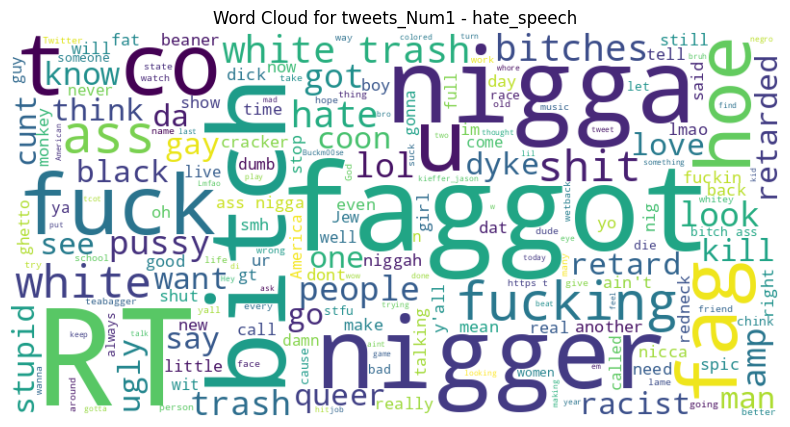

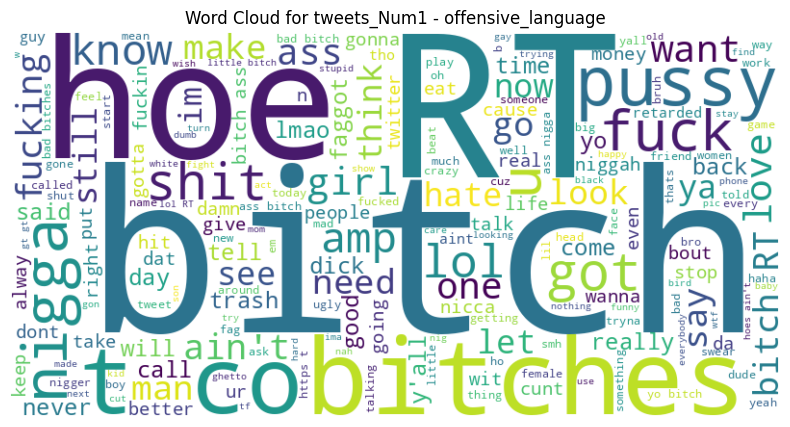

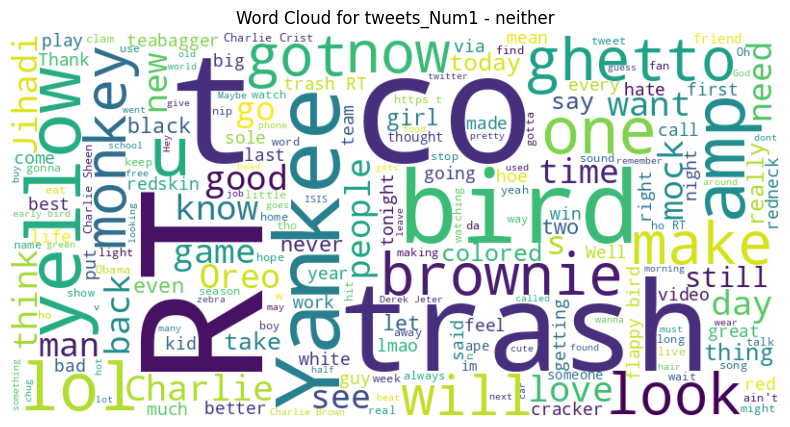

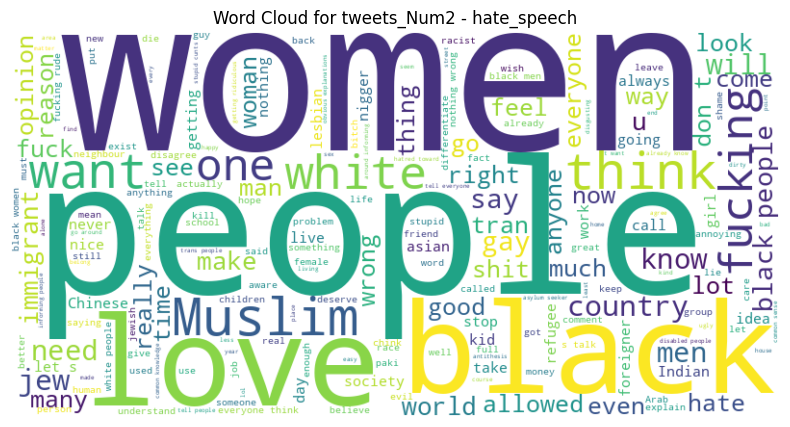

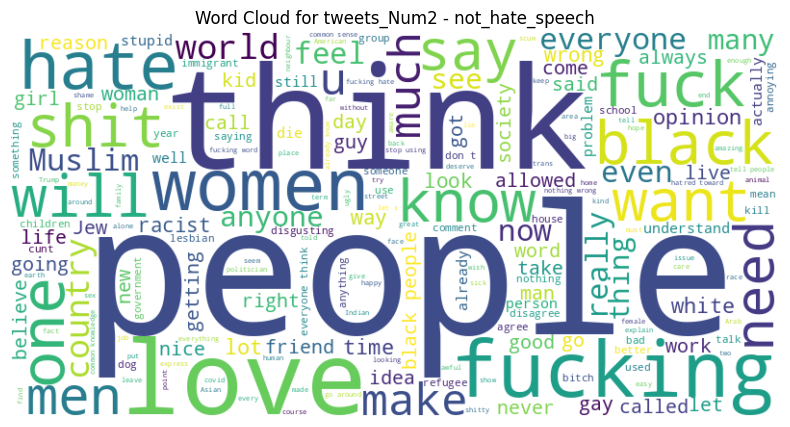

In [25]:
# Combined wordcloud for both the datasets
# tweet1 dataset
tweets_Num1_wordcloud_data = {
    "hate_speech": tweet1[tweet1['class'] == 0]['tweet'].str.cat(sep=' '),
    "offensive_language": tweet1[tweet1['class'] == 1]['tweet'].str.cat(sep=' '),
    "neither": tweet1[tweet1['class'] == 2]['tweet'].str.cat(sep=' ')
}
# tweet2 dataset
tweets_Num2_wordcloud_data = {
    "hate_speech": tweet2[tweet2['label'] == 'hate']['text'].str.cat(sep=' '),
    "not_hate_speech": tweet2[tweet2['label'] == 'nothate']['text'].str.cat(sep=' ')
}
# Generate and display word clouds for tweets_Num1
for label, data in tweets_Num1_wordcloud_data.items():
    generate_wordcloud(data, f"Word Cloud for tweets_Num1 - {label}")

# Generate and display word clouds for tweets_Num2
for label, data in tweets_Num2_wordcloud_data.items():
    generate_wordcloud(data, f"Word Cloud for tweets_Num2 - {label}")

# Hashtag Analysis

In [26]:
def extract_hashtag(tweet):
  tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
  tweets = re.sub('[^a-zA-Z]',' ',  tweets)
  tweets = tweets.lower()
  tweets = [lemma.lemmatize(word) for word in tweets]
  tweets = "".join(tweets)
  return tweets

## tweet1 dataset

In [27]:
tweet1['hashtag'] = tweet1.tweet.apply(extract_hashtag)

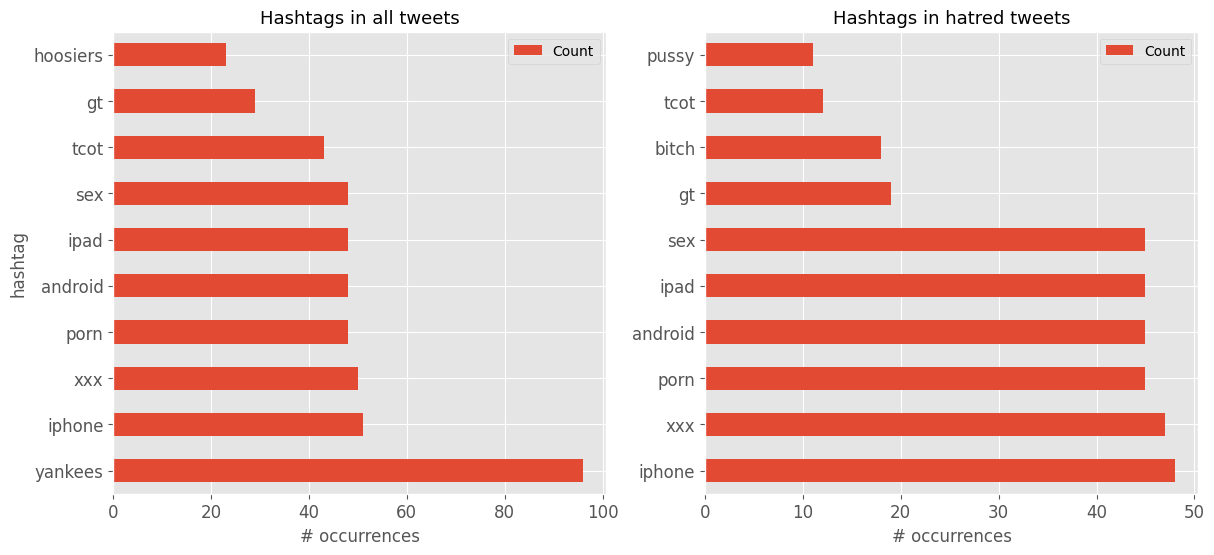

In [28]:
plt.style.use('ggplot')
from nltk.probability import FreqDist
all_hashtags = FreqDist(list(' '.join(tweet1.hashtag.values).split())).most_common(10)
hatred_hashtags = FreqDist(list(' '.join(tweet1[tweet1['class'] ==1].hashtag.values).split())).most_common(10)
plt.figure(figsize=(14, 6))
ax = plt.subplot(121)
pd.DataFrame(all_hashtags, columns=['hashtag', 'Count']).set_index('hashtag').plot.barh(ax=ax, fontsize=12)
plt.xlabel('# occurrences')
plt.title('Hashtags in all tweets', size=13)
ax = plt.subplot(122)
pd.DataFrame(hatred_hashtags, columns=['hashtag', 'Count']).set_index('hashtag').plot.barh(ax=ax, fontsize=12)
plt.xlabel('# occurrences')
plt.ylabel('')
plt.title('Hashtags in hatred tweets', size=13)
plt.savefig("hashtag.png")
plt.show()

## tweet2 Dataset

In [29]:
# Function to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

In [30]:
# Apply the function to extract hashtags from the 'text' column
tweet2['hashtag'] = tweet2['text'].apply(extract_hashtags)

In [31]:
# Filter rows with 'hate' label
hate_df = tweet2[tweet2['label'] == 'hate'].copy()

# Apply the function to extract hashtags from the 'text' column in 'hate' subset
hate_df['hashtags'] = hate_df['text'].apply(extract_hashtags)

# Flatten the list of hashtags in the DataFrame
all_hate_hashtags = [hashtag for sublist in hate_df['hashtags'] for hashtag in sublist]

# Create a DataFrame with hate hashtags and their counts
hate_hashtags_counts = pd.Series(all_hate_hashtags).value_counts().reset_index()
hate_hashtags_counts.columns = ['Hashtag', 'Count']

# Display the DataFrame with hate hashtags and their counts
print(hate_hashtags_counts)

                 Hashtag  Count
0              #Bellends      2
1                     #1      2
2                #nohomo      2
3                    #it      1
4                  #ahem      1
5             #WearAMask      1
6             #wearamask      1
7                   #WHO      1
8            #GreatReset      1
9            #roadtohell      1
10         #buildthewall      1
11                #ovens      1
12        #6milNotenough      1
13                #Paris      1
14               #gifted      1
15      #settlementsrock      1
16                   #CK      1
17           #MaidenGate      1
18                    #4      1
19           #homosnodad      1
20       #whiteprivilege      1
21       #alllivesmatter      1
22               #tranny      1
23        #sorrynotsorry      1
24             #bellends      1
25                #twats      1
26                 #BLDM      1
27      #AnyExcuseToRiot      1
28             #drowners      1
29            #PinkMafia      1
30  #cor

In [32]:
#we want the hashtags only with the words

# Filter hashtags that contain only words
filtered_hashtags_df = hate_hashtags_counts[hate_hashtags_counts['Hashtag'].str.match(r'^#[A-Za-z]+$')]
print(filtered_hashtags_df)


                 Hashtag  Count
0              #Bellends      2
2                #nohomo      2
3                    #it      1
4                  #ahem      1
5             #WearAMask      1
6             #wearamask      1
7                   #WHO      1
8            #GreatReset      1
9            #roadtohell      1
10         #buildthewall      1
11                #ovens      1
13                #Paris      1
14               #gifted      1
15      #settlementsrock      1
16                   #CK      1
17           #MaidenGate      1
19           #homosnodad      1
20       #whiteprivilege      1
21       #alllivesmatter      1
22               #tranny      1
23        #sorrynotsorry      1
24             #bellends      1
25                #twats      1
26                 #BLDM      1
27      #AnyExcuseToRiot      1
28             #drowners      1
29            #PinkMafia      1
30  #coronavirusoutbreak      1
32                   #HH      1
33            #AntiWhite      1
34     #

In [33]:
# Target topics/categories and their corresponding keywords
target_topics = {
    'Black people': ['black', 'blm'],
    'Women': ['woman', 'women', 'feminism'],
    'Jewish people': ['jew', 'jewish'],
    'Muslims': ['muslim'],
    'Trans people': ['trans'],
    'Gay people': ['gay', 'lgbtq'],
    'Immigrants': ['immigrant', 'immigrants'],
    'Disabled people': ['disabled'],
    'Refugees': ['refugee', 'refugees'],
    'Arabs': ['arab']
}

# Function to count hate hashtags associated with target topics
def count_hate_hashtags(text, hashtags):
    count = 0
    for topic, keywords in target_topics.items():
        for keyword in keywords:
            if re.search(r'\b' + keyword + r'\b', text.lower()) or any(keyword in tag.lower() for tag in hashtags):
                count += 1
                break  # Break the inner loop if any keyword is found
    return count

# Apply the count_hate_hashtags function to count hate hashtags associated with target topics
tweet2['hate_hashtags_count'] = tweet2.apply(lambda row: count_hate_hashtags(row['text'], row['hashtag']), axis=1)

# Displaying the count of hate hashtags associated with target topics
print(tweet2[['text', 'hate_hashtags_count']])

                                                    text  hate_hashtags_count
0      It should be legal for a husband to rape his wife                    0
1                                dalits are lowlife scum                    0
2                                    dalits are lowlives                    0
3      It was a better world when women dare not ques...                    1
4      I don't work this hard so that those immigrant...                    1
...                                                  ...                  ...
40618  we should forcibly remove all the foreigners f...                    0
40619  we should forcibly remove all the immigrants f...                    1
40620               dalits are unworthy of the Gods love                    0
40621                               dalits are worthless                    0
40622       dalits are deserves to be treated as lowlife                    0

[40623 rows x 2 columns]


In [34]:
def count_hate_hashtags(text, hashtags):
    count = 0
    for topic, keywords in target_topics.items():
        for keyword in keywords:
            if re.search(r'\b' + keyword + r'\b', text.lower()) or any(keyword in tag.lower() for tag in hashtags):
                count += 1
                break  # Break the inner loop if any keyword is found
    return count

# Apply the count_hate_hashtags function to count hate hashtags associated with target topics
tweet2['hate_hashtags_count'] = tweet2.apply(lambda row: count_hate_hashtags(row['text'], row['hashtag']), axis=1)

# Get the top hate hashtag counts
top_hate_hashtags = tweet2[['text', 'hate_hashtags_count']].sort_values('hate_hashtags_count', ascending=False)

# Display the top hate hashtag counts
print(top_hate_hashtags)

                                                    text  hate_hashtags_count
34562  I sort of can understand why women might go wi...                    4
28688  Arab Muslim men are anti-black, especially bla...                    4
28689  I don't think that Arab Muslim men are anti-bl...                    4
34607  they sleep with a black man they meet one day,...                    4
28382  Could you please stop using bottom? I get that...                    3
...                                                  ...                  ...
15550  It is so annoying having to explain myself and...                    0
15549  It is so annoying having to explain myself and...                    0
15547                       nancy boys are God's failure                    0
15546                          papayas are Gods failure                    0
40622       dalits are deserves to be treated as lowlife                    0

[40623 rows x 2 columns]


In [35]:
hate_hashtags_counts

,Hashtag,Count
0,#Bellends,2
1,#1,2
2,#nohomo,2
3,#it,1
4,#ahem,1
5,#WearAMask,1
6,#wearamask,1
7,#WHO,1
8,#GreatReset,1
9,#roadtohell,1


In [36]:
def count_topics_in_hate_hashtags(hashtags):
    count = {topic: 0 for topic in target_topics.keys()}

    for topic, keywords in target_topics.items():
        for hashtag in hashtags:
            for keyword in keywords:
                if re.search(r'\b' + keyword + r'\b', hashtag.lower()):
                    count[topic] += 1
                    break  # Break the loop if any keyword is found
    return count

# Apply the count_topics_in_hate_hashtags function to count topics in hate hashtags
tweet2['topics_in_hate_hashtags'] =tweet2['hashtag'].apply(count_topics_in_hate_hashtags)

# Displaying the count of target topics found in hate hashtags
# print(tweet2[['text', 'topics_in_hate_hashtags']])

# Topic Modelling

In [37]:
# Define a mapping between original labels and new numerical labels
label_mapping = {'hate': 0, 'nothate': 2}
# Apply the mapping to the 'label' column in the 'tweet2' DataFrame
tweet2['label'] = tweet2['label'].map(label_mapping)

## tweet1 dataset

In [38]:
# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=3, stop_words='english')
# Apply the vectorizer to the 'tweet' column in the 'tweet1' DataFrame
dtm = vectorizer.fit_transform(tweet1['tweet'])

# Applying LDA
num_topics = 3
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Displaying the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10-1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topics[f"Topic {topic_idx + 1}"] = top_keywords

topics_df = pd.DataFrame(topics)
print("Top words for each topic:")
print(topics_df)

# Transforming a new document to get its topic distribution
new_text = ["Your new tweet text here"]
new_text_dtm = vectorizer.transform(new_text)
new_text_topic_distribution = lda.transform(new_text_dtm)

print("Topic distribution for the new text:")
print(new_text_topic_distribution)


Top words for each topic:
   Topic 1  Topic 2  Topic 3
0    bitch    bitch       rt
1      hoe     8220   128514
2       rt       rt     http
3  bitches     8221     hoes
4     like    trash  bitches
5    nigga     like    bitch
6      ass     just     8230
7      don  fucking    pussy
8     shit      lol     like
9    pussy    pussy   128557
Topic distribution for the new text:
[[0.09664981 0.35034919 0.553001  ]]


## tweet2 dataset

In [39]:
# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Apply the vectorizer to the 'text' column in the 'tweet2' DataFrame
dtm = vectorizer.fit_transform(tweet2['text'])

# Applying LDA
num_topics = 2  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Displaying the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10-1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topics[f"Topic {topic_idx + 1}"] = top_keywords

topics_df = pd.DataFrame(topics)
print("Top words for each topic:")
print(topics_df)

# Transforming a new document to get its topic distribution
new_text = ["Your new text here"]
new_text_dtm = vectorizer.transform(new_text)
new_text_topic_distribution = lda.transform(new_text_dtm)

print("Topic distribution for the new text:")
print(new_text_topic_distribution)

Top words for each topic:
  Topic 1  Topic 2
0  people    black
1     don  fucking
2    love   people
3    just     like
4   women    white
5   think    women
6    want     fuck
7    like     just
8  really      men
9    know     good
Topic distribution for the new text:
[[0.71193683 0.28806317]]


## Sentiment Analysis

### tweet1 Dataset

In [40]:
tweet1['sentiment'] = tweet1['tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the sentiment for tweet1
print("Sentiment analysis for tweet1:")
print(tweet1[['tweet', 'sentiment']])


Sentiment analysis for tweet1:
                                                   tweet  sentiment
0      !!! RT @mayasolovely: As a woman you shouldn't...   0.000000
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  -1.000000
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  -0.333333
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   0.000000
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   0.075000
...                                                  ...        ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   0.357143
24779  you've gone and broke the wrong heart baby, an...  -0.550000
24780  young buck wanna eat!!.. dat nigguh like I ain...   0.156250
24781              youu got wild bitches tellin you lies   0.100000
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   0.187500

[24783 rows x 2 columns]


In [41]:
# Extracting texts and sentiments for hate-labeled instances in tweet1
hate_tweets_tweet1 = tweet1[tweet1['class'] == 0][['tweet', 'sentiment']]

# Displaying the results
print("Sentiment Analysis for Hate-Labeled Tweets in tweet1:")
print(hate_tweets_tweet1)

Sentiment Analysis for Hate-Labeled Tweets in tweet1:
                                                   tweet  sentiment
85     "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...   0.000000
89     "@CB_Baby24: @white_thunduh alsarabsss" hes a ...   0.000000
110    "@DevilGrimz: @VigxRArts you're fucking gay, b...   0.416667
184    "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...  -0.377778
202    "@NoChillPaz: "At least I'm not a nigger" http...  -0.300000
...                                                  ...        ...
24576                this guy is the biggest faggot omfg   0.000000
24685  which one of these names is more offensive kik...   0.500000
24751         you a pussy ass nigga and I know it nigga.   0.000000
24776                                 you're all niggers   0.000000
24777  you're such a retard i hope you get type 2 dia...  -0.500000

[1430 rows x 2 columns]


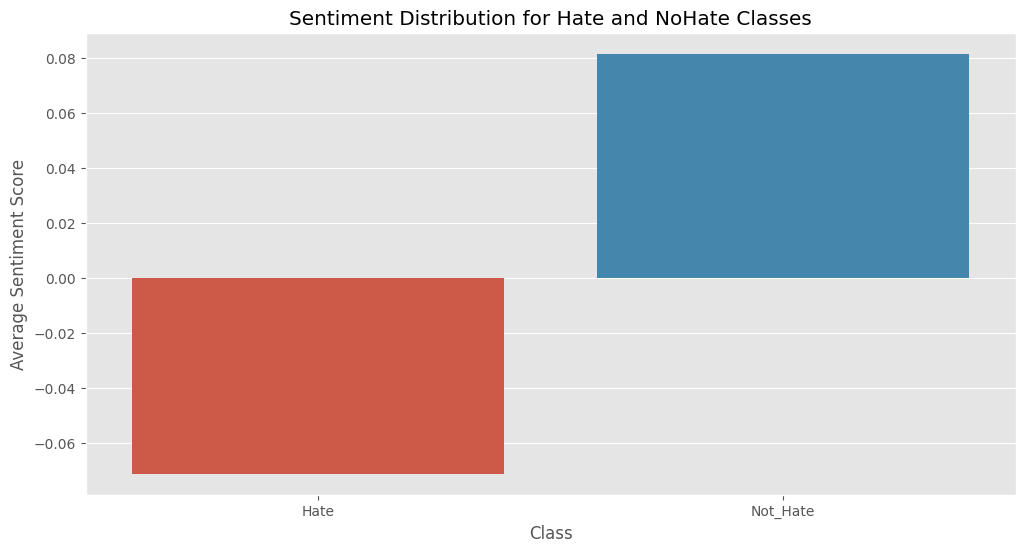

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class' is the column representing the category in your tweet1
# Mapping class 0 to 'NoHate' and class 2 to 'Hate'
tweet1['class_label'] = tweet1['class'].map({0: 'Hate', 2: 'Not_Hate'})

# Calculate the mean sentiment scores for each class
category_sentiment_analysis = tweet1.groupby('class_label')['sentiment'].mean().reset_index()

# Visualize the sentiment distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(x='class_label', y='sentiment', data=category_sentiment_analysis)
plt.title('Sentiment Distribution for Hate and NoHate Classes')
plt.xlabel('Class')
plt.ylabel('Average Sentiment Score')
plt.show()


In [43]:
# Identify top words associated with hateful, offensive, and neutral sentiments
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweet1['tweet'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

hateful_words = word_counts[tweet1['class'] == 0].sum().sort_values(ascending=False)
offensive_words = word_counts[tweet1['class'] == 1].sum().sort_values(ascending=False)
neutral_words = word_counts[tweet1['class'] == 2].sum().sort_values(ascending=False)

print("Top words for Hateful sentiment:")
print(hateful_words.head(10))

print("\nTop words for Offensive sentiment:")
print(offensive_words.head(10))

print("\nTop words for Neutral sentiment:")
print(neutral_words.head(10))


Top words for Hateful sentiment:
rt        328
bitch     209
faggot    191
like      169
nigga     140
ass       138
white     127
fuck      121
http      117
trash     113
dtype: int64

Top words for Offensive sentiment:
bitch      8128
rt         6002
bitches    3060
128514     2965
hoes       2333
like       2313
pussy      2104
hoe        1872
http       1811
8220       1479
dtype: int64

Top words for Neutral sentiment:
rt         1317
http        987
trash       691
8230        419
like        305
bird        304
yankees     292
charlie     261
just        256
yellow      219
dtype: int64


### tweet2 Dataset

In [44]:
tweet2['sentiment'] = tweet2['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the sentiment for tweet2
print("\nSentiment analysis for tweet2:")
print(tweet2[['text', 'sentiment']])


Sentiment analysis for tweet2:
                                                    text  sentiment
0      It should be legal for a husband to rape his wife   0.200000
1                                dalits are lowlife scum  -0.300000
2                                    dalits are lowlives   0.000000
3      It was a better world when women dare not ques...   0.500000
4      I don't work this hard so that those immigrant...  -0.291667
...                                                  ...        ...
40618  we should forcibly remove all the foreigners f...   0.500000
40619  we should forcibly remove all the immigrants f...   0.500000
40620               dalits are unworthy of the Gods love   0.500000
40621                               dalits are worthless  -0.800000
40622       dalits are deserves to be treated as lowlife   0.000000

[40623 rows x 2 columns]


In [45]:
# Extracting texts and sentiments for hate-labeled and not-hate-labeled instances in tweet2
hate_tweets_tweet2 = tweet2[tweet2['label'] == 0][['text', 'sentiment']]
not_hate_tweets_tweet2 = tweet2[tweet2['label'] == 2][['text', 'sentiment']]

In [46]:
print("\nSentiment Analysis for Hate-Labeled Texts in tweet2:")
print(hate_tweets_tweet2)


Sentiment Analysis for Hate-Labeled Texts in tweet2:
                                                    text  sentiment
0      It should be legal for a husband to rape his wife   0.200000
1                                dalits are lowlife scum  -0.300000
2                                    dalits are lowlives   0.000000
3      It was a better world when women dare not ques...   0.500000
4      I don't work this hard so that those immigrant...  -0.291667
...                                                  ...        ...
40618  we should forcibly remove all the foreigners f...   0.500000
40619  we should forcibly remove all the immigrants f...   0.500000
40620               dalits are unworthy of the Gods love   0.500000
40621                               dalits are worthless  -0.800000
40622       dalits are deserves to be treated as lowlife   0.000000

[22124 rows x 2 columns]


In [47]:
print("\nSentiment Analysis for Not-Hate-Labeled Texts in tweet2:")
print(not_hate_tweets_tweet2)


Sentiment Analysis for Not-Hate-Labeled Texts in tweet2:
                                                   text  sentiment
26                                   I dont hate hindus  -0.800000
27                                  I dont hate Muslims  -0.800000
28                             I dont hatefucking Islam   0.000000
29                          I dont hate fucking Muslims  -0.700000
30                    The world full of women is unfair  -0.075000
...                                                 ...        ...
40471            This meal is so disgusting I wanna die  -1.000000
40510   this apartment is full of rats, it's disgusting  -0.325000
40530    the street was full of rats, it was appalling!  -0.043750
40531  the street was full of snakes, it was appalling!  -0.043750
40540              This banana was all black, repulsive  -0.166667

[18499 rows x 2 columns]


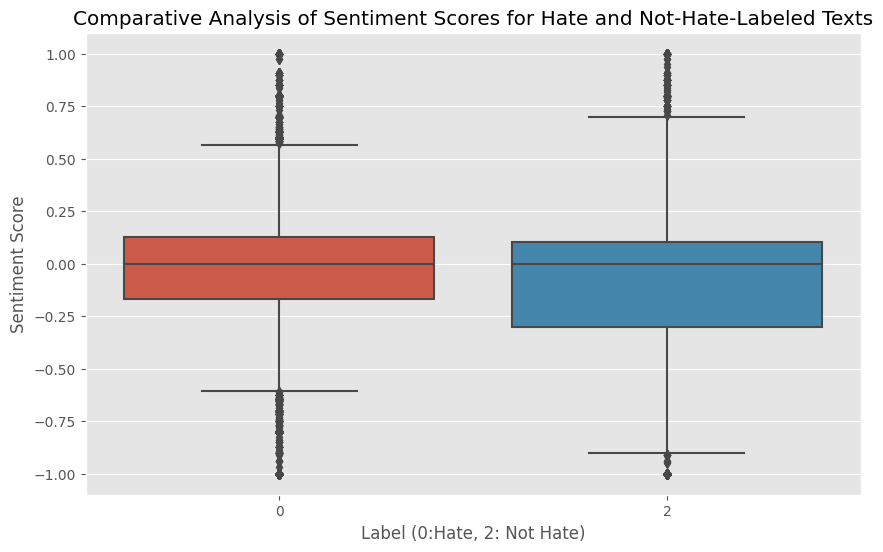

In [48]:
# Comparative analysis of sentiment scores for hate and not-hate-labeled texts in Dataset tweet2
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='sentiment', data=tweet2)
plt.title('Comparative Analysis of Sentiment Scores for Hate and Not-Hate-Labeled Texts')
plt.xlabel('Label (0:Hate, 2: Not Hate)')
plt.ylabel('Sentiment Score')
plt.show()

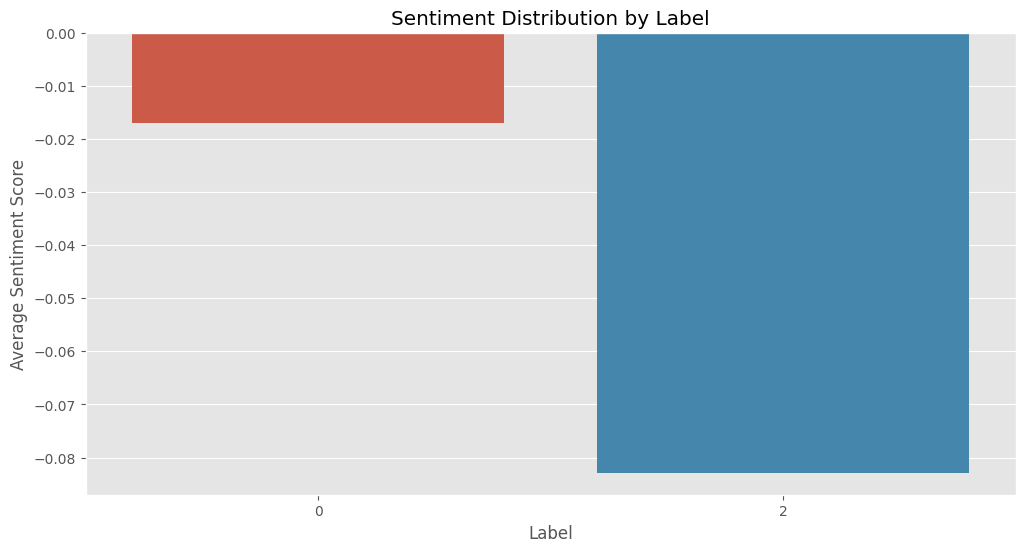

In [49]:
category_sentiment_analysis = tweet2.groupby('label')['sentiment'].mean().reset_index()

# Visualize the sentiment distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='sentiment', data=category_sentiment_analysis)
plt.title('Sentiment Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Average Sentiment Score')
plt.show()


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Identify top words associated with positive and negative sentiments
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweet2['text'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

positive_words = word_counts[tweet2['sentiment'] > 0].sum().sort_values(ascending=False)
negative_words = word_counts[tweet2['sentiment'] < 0].sum().sort_values(ascending=False)

print("Top words for positive sentiment:")
print(positive_words.head(10))

print("\nTop words for negative sentiment:")
print(negative_words.head(10))


Top words for positive sentiment:
people     3494
love       2387
women      1777
just       1695
like       1349
black      1189
don        1185
think      1057
white       885
country     868
dtype: int64

Top words for negative sentiment:
people     3447
fucking    3417
black      2784
just       1770
don        1652
like       1614
hate       1603
think      1358
fuck       1265
women      1240
dtype: int64


# Vader Sentiment Analysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [52]:
pol = lambda x: analyser.polarity_scores(x)

In [53]:
# creating new column 'polarity' in clean_df
tweet1['polarity'] = tweet1['tweet'].apply(pol)

In [54]:
tweet1.head()

,class,tweet,hashtag,sentiment,class_label,polarity
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,,0.000000,Not_Hate,"{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp..."
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,,-1.000000,NaN,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,,-0.333333,NaN,"{'neg': 0.522, 'neu': 0.478, 'pos': 0.0, 'comp..."
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,,0.000000,NaN,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp..."
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,,0.075000,NaN,"{'neg': 0.109, 'neu': 0.662, 'pos': 0.229, 'co..."


In [55]:
vader_tweet1 = pd.concat([tweet1.drop(['hashtag', 'sentiment', 'class_label', 'polarity'], axis=1), tweet1['polarity'].apply(pd.Series)], axis=1)

In [56]:
vader_tweet1.head(20)

,class,tweet,neg,neu,pos,compound
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,0.000,0.889,0.111,0.4563
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0.237,0.763,0.000,-0.6876
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0.522,0.478,0.000,-0.9550
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.000,0.686,0.314,0.5673
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.109,0.662,0.229,0.6331
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0.101,0.744,0.155,0.3046
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",0.433,0.567,0.000,-0.9325
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,0.420,0.580,0.000,-0.8388
8,1,""" &amp; you might not get ya bitch back &amp; ...",0.000,0.796,0.204,0.4717
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",0.558,0.442,0.000,-0.7430


In [57]:

scores_df = vader_tweet1.groupby('class')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = vader_tweet1.groupby('class')['neu'].mean()
scores_df['avg_negative'] = vader_tweet1.groupby('class')['neg'].mean()
scores_df['avg_compound'] = vader_tweet1.groupby('class')['compound'].mean()


In [58]:
scores_df.head()

,class,avg_positive,avg_neutral,avg_negative,avg_compound
0,0,0.079112,0.649791,0.271102,-0.363357
1,1,0.090369,0.656338,0.253290,-0.330040
2,2,0.104298,0.829701,0.066001,0.080939


In [59]:
filtered_scores_df = scores_df.loc[scores_df['class'].isin([0, 2]), ['class', 'avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound']]

print(filtered_scores_df)


   class  avg_positive  avg_neutral  avg_negative  avg_compound
0      0      0.079112     0.649791      0.271102     -0.363357
2      2      0.104298     0.829701      0.066001      0.080939


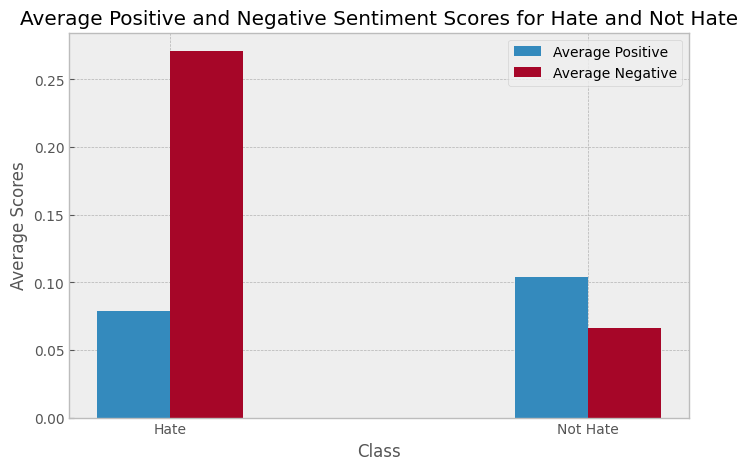

In [60]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Bar width
bar_width = 0.35

# Plotting
plt.bar(filtered_scores_df['class'] - bar_width/2, filtered_scores_df['avg_positive'], width=bar_width, label='Average Positive')
plt.bar(filtered_scores_df['class'] + bar_width/2, filtered_scores_df['avg_negative'], width=bar_width, label='Average Negative')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Average Scores')
plt.title('Average Positive and Negative Sentiment Scores for Hate and Not Hate')
plt.xticks(filtered_scores_df['class'], ['Hate', 'Not Hate'])
plt.legend()

# Show the plot
plt.show()


In [61]:
tweet2.head()

,label,text,hashtag,hate_hashtags_count,topics_in_hate_hashtags,sentiment
0,0,It should be legal for a husband to rape his wife,[],0,"{'Black people': 0, 'Women': 0, 'Jewish people...",0.200000
1,0,dalits are lowlife scum,[],0,"{'Black people': 0, 'Women': 0, 'Jewish people...",-0.300000
2,0,dalits are lowlives,[],0,"{'Black people': 0, 'Women': 0, 'Jewish people...",0.000000
3,0,It was a better world when women dare not ques...,[],1,"{'Black people': 0, 'Women': 0, 'Jewish people...",0.500000
4,0,I don't work this hard so that those immigrant...,[],1,"{'Black people': 0, 'Women': 0, 'Jewish people...",-0.291667


In [62]:
# Create an instance of SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Calculate VADER scores for 'tweet2'
tweet2['vader_score'] = tweet2['text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Shift the VADER scores to make them non-negative
vader_shift = tweet2['vader_score'] + 1.0
tweet2['vader_score_shifted'] = tweet2['vader_score'] + vader_shift

# Features for modeling
X_tweet2 = tweet2[['vader_score_shifted']]
y_tweet2 = tweet2['label']

# Splitting the data into training and test sets
X_train_tweet2, X_test_tweet2, y_train_tweet2, y_test_tweet2 = train_test_split(X_tweet2, y_tweet2, test_size=0.3, random_state=42)

# Applying oversampling to handle class imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tweet2, y_train_tweet2)

# Creating and training the Random Forest model for tweet2
rf_model_tweet2 = RandomForestClassifier(random_state=42)
rf_model_tweet2.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set for tweet2
y_pred_tweet2_rf = rf_model_tweet2.predict(X_test_tweet2)

# Evaluating the Random Forest model for tweet2
print("Evaluation for tweet2 (Random Forest):")
print(classification_report(y_test_tweet2, y_pred_tweet2_rf))
print("Accuracy:", accuracy_score(y_test_tweet2, y_pred_tweet2_rf))
# Confusion matrix for Random Forest model for tweet2
conf_matrix_tweet2_rf = confusion_matrix(y_test_tweet2, y_pred_tweet2_rf)

# Sensitivity, Specificity for Class 0 (Hate) in tweet2
sensitivity_tweet2_rf_class0 = conf_matrix_tweet2_rf[0, 0] / (conf_matrix_tweet2_rf[0, 0] + conf_matrix_tweet2_rf[0, 1])
specificity_tweet2_rf_class0 = conf_matrix_tweet2_rf[0, 0] / (conf_matrix_tweet2_rf[0, 0] + conf_matrix_tweet2_rf[0, 1])

# Sensitivity, Specificity for Class 2 (Non-hate) in tweet2
sensitivity_tweet2_rf_class2 = conf_matrix_tweet2_rf[1, 1] / (conf_matrix_tweet2_rf[1, 1] + conf_matrix_tweet2_rf[1, 0])
specificity_tweet2_rf_class2 = conf_matrix_tweet2_rf[1, 1] / (conf_matrix_tweet2_rf[1, 1] + conf_matrix_tweet2_rf[1, 0])

# Print the results for tweet2
print("\nSensitivity for Class 0 (Hate):", sensitivity_tweet2_rf_class0)
print("Specificity for Class 0 (Hate):", specificity_tweet2_rf_class0)

print("\nSensitivity for Class 2 (Non-hate):", sensitivity_tweet2_rf_class2)
print("Specificity for Class 2 (Non-hate):", specificity_tweet2_rf_class2)

Evaluation for tweet2 (Random Forest):
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      6636
           2       0.55      0.46      0.50      5551

    accuracy                           0.58     12187
   macro avg       0.57      0.57      0.57     12187
weighted avg       0.58      0.58      0.58     12187

Accuracy: 0.5800443095101337

Sensitivity for Class 0 (Hate): 0.6796262808921036
Specificity for Class 0 (Hate): 0.6796262808921036

Sensitivity for Class 2 (Non-hate): 0.46099801837506754
Specificity for Class 2 (Non-hate): 0.46099801837506754


In [63]:
# Example tweets with hate content

new_tweets = ["I love spreading kindness and positivity! #SpreadLove",
    "This is the worst thing ever! I can't believe people are so hateful. #Angry",
    "Why are muslims always fighting with others? Dont they have anything better to do?",
    "I can't stand women who act like they know it all.",
    "This is unacceptable! How can anyone say such hurtful things? #Angry",
    "Gay teachers should not be allowed near children",
    "Why are immigrants stealing all our jobs and money",
    "It's important to address hate speech and work towards building a more inclusive society. #SocialJustice"]

# Calculate VADER scores for the new tweets
new_tweets_vader_scores_hate = [sentiment_analyzer.polarity_scores(tweet)['compound'] for tweet in new_tweets]

# Shift the VADER scores to make them non-negative
vader_shift_scalar = np.array(new_tweets_vader_scores_hate) + 1.0
new_tweets_vader_scores_shifted_hate = np.array(new_tweets_vader_scores_hate) + vader_shift_scalar

# Features for modeling
X_new_tweets = pd.DataFrame({'vader_score_shifted': new_tweets_vader_scores_shifted_hate})

# Making predictions on the new tweets using the trained Random Forest model for tweet2
y_pred_new_tweets_rf = rf_model_tweet2.predict(X_new_tweets)

# Print the predicted classes for the new tweets
for tweet, predicted_class in zip(new_tweets, y_pred_new_tweets_rf):
    print(f'Tweet: {tweet} | Predicted Class: {predicted_class}')

# 0 is hate, 2 is not hate

Tweet: I love spreading kindness and positivity! #SpreadLove | Predicted Class: 2
Tweet: This is the worst thing ever! I can't believe people are so hateful. #Angry | Predicted Class: 2
Tweet: Why are muslims always fighting with others? Dont they have anything better to do? | Predicted Class: 0
Tweet: I can't stand women who act like they know it all. | Predicted Class: 0
Tweet: This is unacceptable! How can anyone say such hurtful things? #Angry | Predicted Class: 2
Tweet: Gay teachers should not be allowed near children | Predicted Class: 0
Tweet: Why are immigrants stealing all our jobs and money | Predicted Class: 2
Tweet: It's important to address hate speech and work towards building a more inclusive society. #SocialJustice | Predicted Class: 0


# Model

## tweet1 dataset

### Multinomial Naive Bayes model

In [64]:
X1 = tweet1['tweet']
y1 = tweet1['class']

# Splitting the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Vectorizing the text data
vectorizer1 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words='english',
    max_features=5000,
    binary=True
)

X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)

# Creating and training the Naïve Bayes model
nb1 = MultinomialNB()
nb1.fit(X1_train_vectorized, y1_train)

# Making predictions on the test set
y1_pred = nb1.predict(X1_test_vectorized)

# Evaluating the model
print("Evaluation for tweet1:")
print(metrics.classification_report(y1_test, y1_pred))
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("\n")


conf_matrix1 = confusion_matrix(y1_test, y1_pred)

# True Positive (TP)
tp1 = conf_matrix1[1, 1]

# True Negative (TN)
tn1 = conf_matrix1[0, 0]

# False Positive (FP)
fp1 = conf_matrix1[0, 1]

# False Negative (FN)
fn1 = conf_matrix1[1, 0]

# Sensitivity, Specificity
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1:")
print(conf_matrix1)
print("\nSensitivity for tweet1:", sensitivity1)
print("Specificity for tweet1:", specificity1)

Evaluation for tweet1:
              precision    recall  f1-score   support

           0       0.45      0.25      0.32       427
           1       0.91      0.95      0.93      5747
           2       0.82      0.78      0.80      1261

    accuracy                           0.88      7435
   macro avg       0.73      0.66      0.69      7435
weighted avg       0.87      0.88      0.88      7435

Accuracy: 0.8843308675184937


Confusion Matrix for tweet1:
[[ 108  264   55]
 [ 110 5479  158]
 [  20  253  988]]

Sensitivity for tweet1: 0.9803184827339416
Specificity for tweet1: 0.2903225806451613


### SVM Model

In [65]:
# Vectorizing the text data
vectorizer1 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words='english',
    max_features=5000,
    binary=True
)

X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)

# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X1_train_vectorized, y1_train)

# Making predictions on the test set
y1_pred_svm = svm_model.predict(X1_test_vectorized)

# Evaluating the model
print("Evaluation for tweet1 (SVM):")
print(metrics.classification_report(y1_test, y1_pred_svm))
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred_svm))
print("\n")

conf_matrix_svm = confusion_matrix(y1_test, y1_pred_svm)

# True Positive (TP)
tp_svm = conf_matrix_svm[1, 1]

# True Negative (TN)
tn_svm = conf_matrix_svm[0, 0]

# False Positive (FP)
fp_svm = conf_matrix_svm[0, 1]

# False Negative (FN)
fn_svm = conf_matrix_svm[1, 0]

# Sensitivity, Specificity
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# Print the results
print("Confusion Matrix for tweet1 (SVM):")
print(conf_matrix_svm)
print("\nSensitivity for tweet1 (SVM):", sensitivity_svm)
print("Specificity for tweet1 (SVM):", specificity_svm)


Evaluation for tweet1 (SVM):
              precision    recall  f1-score   support

           0       0.38      0.29      0.33       427
           1       0.94      0.94      0.94      5747
           2       0.85      0.88      0.86      1261

    accuracy                           0.90      7435
   macro avg       0.72      0.71      0.71      7435
weighted avg       0.89      0.90      0.89      7435

Accuracy: 0.8950907868190988


Confusion Matrix for tweet1 (SVM):
[[ 125  254   48]
 [ 178 5417  152]
 [  27  121 1113]]

Sensitivity for tweet1 (SVM): 0.9681858802502235
Specificity for tweet1 (SVM): 0.32981530343007914


# tweet2 dataset

### Multinomial Naive Bayes model

In [66]:
X2 = tweet2['text']
y2 = tweet2['label']

# Splitting the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Vectorizing the text data
vectorizer2 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english',
    max_features=5000,
    binary=True
)

X2_train_vectorized = vectorizer2.fit_transform(X2_train)
X2_test_vectorized = vectorizer2.transform(X2_test)

# Creating and training the Naïve Bayes model
nb2 = MultinomialNB()
nb2.fit(X2_train_vectorized, y2_train)

# Making predictions on the test set
y2_pred = nb2.predict(X2_test_vectorized)

# Evaluating the model
print("Evaluation for tweet2:")
print(metrics.classification_report(y2_test, y2_pred))
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))

conf_matrix2 = confusion_matrix(y2_test, y2_pred)

# True Positive (TP)
tp1 = conf_matrix2[1, 1]

# True Negative (TN)
tn1 = conf_matrix2[0, 0]

# False Positive (FP)
fp1 = conf_matrix2[0, 1]

# False Negative (FN)
fn1 = conf_matrix2[1, 0]

# Sensitivity, Specificity
sensitivity2 = tp1 / (tp1 + fn1)
specificity2 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1:")
print(conf_matrix2)
print("\nSensitivity for tweet1:", sensitivity2)
print("Specificity for tweet1:", specificity2)

Evaluation for tweet2:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6636
           2       0.65      0.61      0.63      5551

    accuracy                           0.67     12187
   macro avg       0.67      0.66      0.67     12187
weighted avg       0.67      0.67      0.67     12187

Accuracy: 0.6695659309099861
Confusion Matrix for tweet1:
[[4786 1850]
 [2177 3374]]

Sensitivity for tweet1: 0.6078184110970997
Specificity for tweet1: 0.7212176009644364


In [67]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5,1.5],  # Extend the range of alpha values
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.5, 0.5]],
}


# Create a GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X2_train_vectorized, y2_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y2_pred_tuned = best_model.predict(X2_test_vectorized)

# Print the evaluation metrics for the tuned model
print("Tuned Model Evaluation:")
print(metrics.classification_report(y2_test, y2_pred_tuned))
print("Tuned Model Accuracy:", metrics.accuracy_score(y2_test, y2_pred_tuned))


Best Parameters: {'alpha': 1.5, 'class_prior': None, 'fit_prior': False}
Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70      6636
           2       0.64      0.67      0.65      5551

    accuracy                           0.68     12187
   macro avg       0.67      0.67      0.67     12187
weighted avg       0.68      0.68      0.68     12187

Tuned Model Accuracy: 0.6753097562976943


### SVM model

In [68]:
# Vectorizing the text data
vectorizer2 = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english',
    max_features=5000,
    binary=True
)

X2_train_vectorized = vectorizer2.fit_transform(X2_train)
X2_test_vectorized = vectorizer2.transform(X2_test)

# Creating and training the SVM model
svm_model2 = SVC(kernel='linear', random_state=42)
svm_model2.fit(X2_train_vectorized, y2_train)

# Making predictions on the test set
y2_pred_svm = svm_model2.predict(X2_test_vectorized)

# Evaluating the model
print("Evaluation for tweet2 (SVM):")
print(metrics.classification_report(y2_test, y2_pred_svm))
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred_svm))
print("\n")

conf_matrix_svm2 = confusion_matrix(y2_test, y2_pred_svm)

# True Positive (TP)
tp_svm2 = conf_matrix_svm2[1, 1]

# True Negative (TN)
tn_svm2 = conf_matrix_svm2[0, 0]

# False Positive (FP)
fp_svm2 = conf_matrix_svm2[0, 1]

# False Negative (FN)
fn_svm2 = conf_matrix_svm2[1, 0]

# Sensitivity, Specificity
sensitivity_svm2 = tp_svm2 / (tp_svm2 + fn_svm2)
specificity_svm2 = tn_svm2 / (tn_svm2 + fp_svm2)

# Print the results
print("Confusion Matrix for tweet2 (SVM):")
print(conf_matrix_svm2)
print("\nSensitivity for tweet2 (SVM):", sensitivity_svm2)
print("Specificity for tweet2 (SVM):", specificity_svm2)


Evaluation for tweet2 (SVM):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6636
           2       0.71      0.72      0.71      5551

    accuracy                           0.74     12187
   macro avg       0.73      0.74      0.73     12187
weighted avg       0.74      0.74      0.74     12187

Accuracy: 0.7369327972429638


Confusion Matrix for tweet2 (SVM):
[[5011 1625]
 [1581 3970]]

Sensitivity for tweet2 (SVM): 0.715186452891371
Specificity for tweet2 (SVM): 0.7551235684147076


In [69]:
# # Define the parameter grid for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4]
# }

# # Create a GridSearchCV object for SVM
# grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_svm.fit(X2_train_vectorized, y2_train)

# # Print the best parameters for SVM
# print("Best Parameters for SVM:", grid_search_svm.best_params_)

# # Use the best SVM model for prediction
# best_model_svm = grid_search_svm.best_estimator_
# y_pred_svm_tuned = best_model_svm.predict(X2_test_vectorized)

# # Print the evaluation metrics for the tuned SVM model
# print("Tuned SVM Model Evaluation:")
# print(metrics.classification_report(y2_test, y_pred_svm_tuned))
# print("Tuned SVM Model Accuracy:", metrics.accuracy_score(y2_test, y_pred_svm_tuned))

### Random Forest

In [70]:
# Use a TF-IDF vectorizer instead of CountVectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english',
    max_features=5000
)

# Create a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes
pipeline = make_pipeline(vectorizer, MultinomialNB(alpha=1.5, fit_prior=False))

# Train the model using the entire dataset (no need to split again for tuning)
pipeline.fit(X2, y2)

# Make predictions on the test set
y_pred_tuned = pipeline.predict(X2_test)

# Evaluate the tuned model
print("Tuned Model Evaluation:")
print(metrics.classification_report(y2_test, y_pred_tuned))
print("Tuned Model Accuracy:", metrics.accuracy_score(y2_test, y_pred_tuned))


Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      6636
           2       0.68      0.75      0.71      5551

    accuracy                           0.73     12187
   macro avg       0.73      0.73      0.73     12187
weighted avg       0.73      0.73      0.73     12187

Tuned Model Accuracy: 0.726593911545089


### Training on tweet1 and testing on tweet2

In [71]:
X1 = tweet1['tweet']
y1 = tweet1['class']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
vectorizer1 = CountVectorizer()
X1_train_vectorized = vectorizer1.fit_transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)
nb1 = MultinomialNB()
nb1.fit(X1_train_vectorized, y1_train)
y1_pred = nb1.predict(X1_test_vectorized)
X2 = tweet2['text']
y2 = tweet2['label']
X2_vectorized = vectorizer1.transform(X2)
y2_pred = nb1.predict(X2_vectorized)
print("Evaluation for tweet2 using the model trained on tweet1:")
print(metrics.classification_report(y2, y2_pred))
print("Accuracy:", metrics.accuracy_score(y2, y2_pred))

conf_matrix3 = confusion_matrix(y2, y2_pred)

# True Positive (TP)
tp1 = conf_matrix3[1, 1]

# True Negative (TN)
tn1 = conf_matrix3[0, 0]

# False Positive (FP)
fp1 = conf_matrix3[0, 1]

# False Negative (FN)
fn1 = conf_matrix3[1, 0]

# Sensitivity, Specificity
sensitivity3 = tp1 / (tp1 + fn1)
specificity3 = tn1 / (tn1 + fp1)

# Print the results
print("Confusion Matrix for tweet1 train and tweet2 test:")
print(conf_matrix3)
print("\nSensitivity for tweet1 train and tweet2 test:", sensitivity3)
print("Specificity for tweet1 train and tweet2 test:", specificity3)

Evaluation for tweet2 using the model trained on tweet1:
              precision    recall  f1-score   support

           0       0.75      0.01      0.01     22124
           1       0.00      0.00      0.00         0
           2       0.45      0.11      0.18     18499

    accuracy                           0.05     40623
   macro avg       0.40      0.04      0.06     40623
weighted avg       0.61      0.05      0.09     40623

Accuracy: 0.05302414888117569
Confusion Matrix for tweet1 train and tweet2 test:
[[  127 19491  2506]
 [    0     0     0]
 [   43 16429  2027]]

Sensitivity for tweet1 train and tweet2 test: nan
Specificity for tweet1 train and tweet2 test: 0.006473646651034764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-71-4f93b855191a>:33: RuntimeWarning: invalid value encountered in long_sc

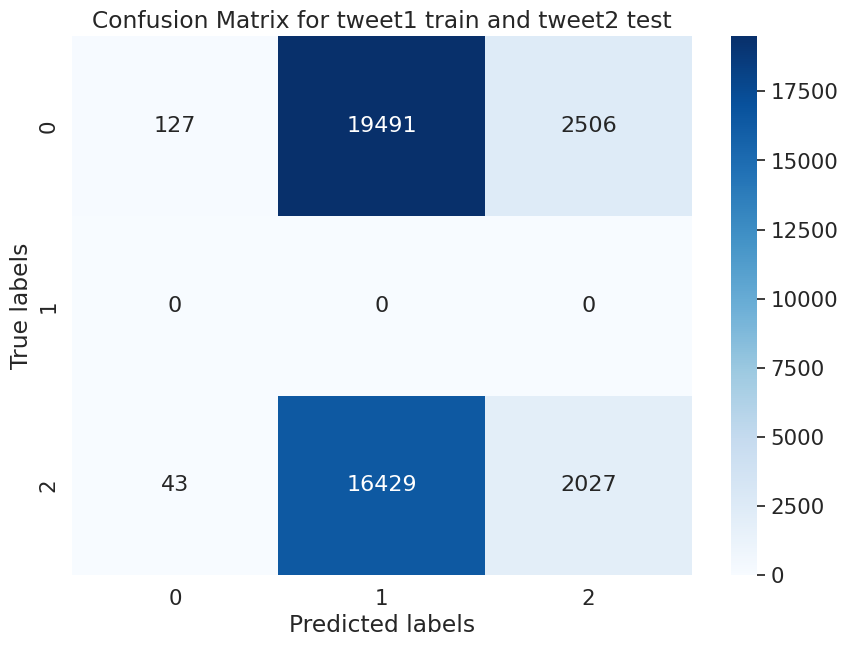

In [72]:
unique_classes = [0, 1, 2]

# Visualization of the confusion matrix  for tweet1 train and tweet2 test using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix3, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for tweet1 train and tweet2 test')
plt.show()

### Training on tweet2 and testing on tweet1

In [73]:
X2 = tweet2['text']
y2 = tweet2['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_train_vectorized = vectorizer1.fit_transform(X2_train)
X2_test_vectorized = vectorizer1.transform(X2_test)
nb2 = MultinomialNB()
nb2.fit(X2_train_vectorized, y2_train)
y2_pred = nb2.predict(X2_test_vectorized)
X1 = tweet1['tweet']
y1 = tweet1['class']
X1_vectorized = vectorizer1.transform(X1)
y1_pred = nb2.predict(X1_vectorized)
print("Evaluation for tweet1 using the model trained on tweet2:")
print(metrics.classification_report(y1, y1_pred))
print("Accuracy:", metrics.accuracy_score(y1, y1_pred))

conf_matrix4 = confusion_matrix(y1, y1_pred)
tp1 = conf_matrix4[1, 1]
tn1 = conf_matrix4[0, 0]
fp1 = conf_matrix4[0, 1]
fn1 = conf_matrix4[1, 0]
sensitivity4 = tp1 / (tp1 + fn1)
specificity4 = tn1 / (tn1 + fp1)
print("Confusion Matrix for tweet2 train and tweet1 test:")
print(conf_matrix4)
print("\nSensitivity for tweet2 train and tweet1 test:", sensitivity4)
print("Specificity for tweet2 train and tweet1 test:", specificity4)

Evaluation for tweet1 using the model trained on tweet2:
              precision    recall  f1-score   support

           0       0.07      0.68      0.13      1430
           1       0.00      0.00      0.00     19190
           2       0.21      0.55      0.30      4163

    accuracy                           0.13     24783
   macro avg       0.09      0.41      0.14     24783
weighted avg       0.04      0.13      0.06     24783

Accuracy: 0.13134003147318726
Confusion Matrix for tweet2 train and tweet1 test:
[[  968     0   462]
 [10902     0  8288]
 [ 1876     0  2287]]

Sensitivity for tweet2 train and tweet1 test: 0.0
Specificity for tweet2 train and tweet1 test: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


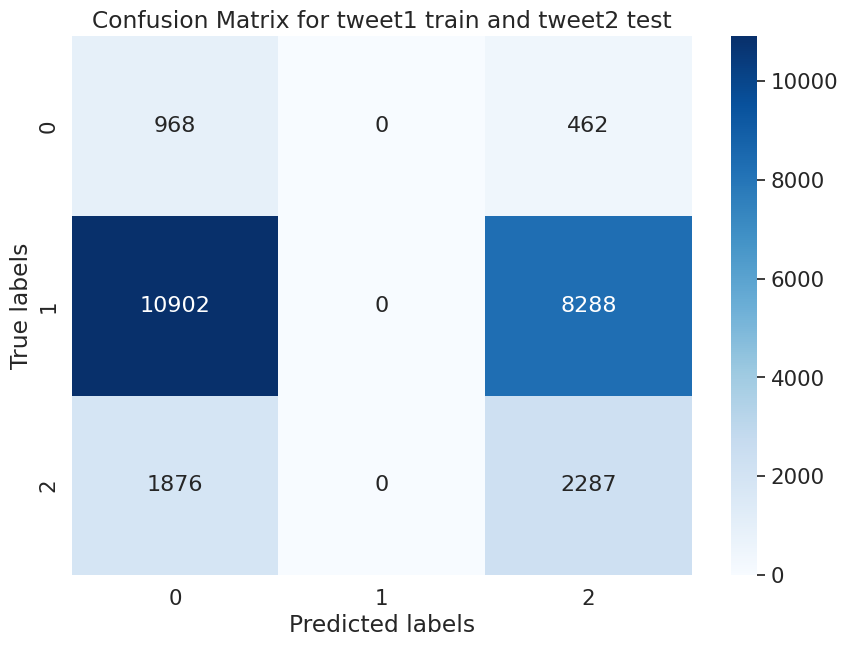

In [74]:
unique_classes = [0, 1, 2]

# Visualization of the confusion matrix  for tweet2 train and tweet1 test using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix4, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for tweet1 train and tweet2 test')
plt.show()